In [49]:
from time import sleep

import cv2
import matplotlib.pyplot as plt
import numpy as np
import signal
import sys

In [10]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

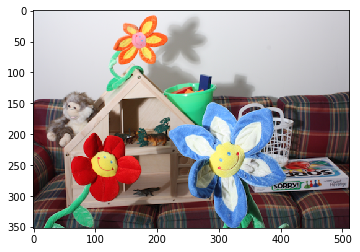

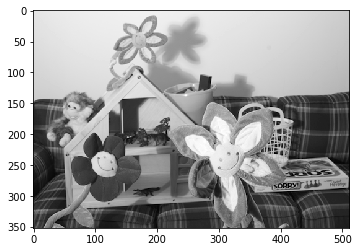

In [48]:
img = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)

# cv2.imshow('title image', img)
# cv2.destroyAllWindows()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb, 'gnuplot2')
plt.show()

plt.imshow(img_gray, 'gray')
plt.show()

plt.close()

<IPython.core.display.Javascript object>


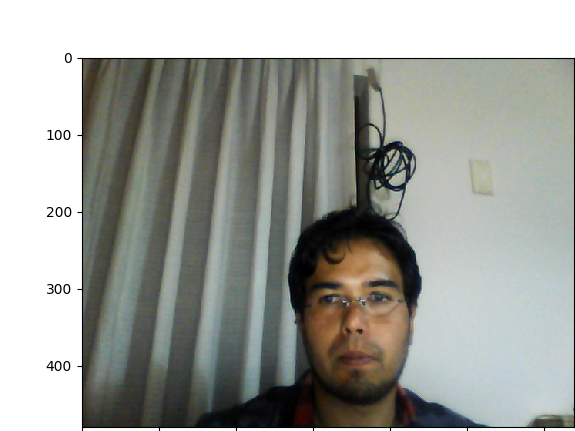

/home/xmn/anaconda3/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [39]:
%matplotlib notebook
vc = cv2.VideoCapture(0)

# codec
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(
    filename='out.avi', 
    fourcc=fourcc, 
    fps=8.0, 
    frameSize=(640, 480)
)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame, cmap='gnuplot2')    
else:
    is_capturing = False


is_interrupted = False
signal.signal(signal.SIGINT, signal_handler)

while is_capturing:
    is_capturing, frame = vc.read()
    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    webcam_preview.set_data(frame_rgb)
    out.write(frame)
    
    plt.draw()
    
    try:
        plt.pause(0.05)
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        out.release()
        break

plt.ioff()
plt.close()

In [52]:
img = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)

cv2.imshow('title image', img)

is_interrupted = False
signal.signal(signal.SIGINT, signal_handler)

while True:
    try:
        sleep(0.5)
    except Exception:
        pass
    
    if is_interrupted:
        cv2.destroyAllWindows()
        break